<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('..\Dados\Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [4]:
dados.shape[0]

365

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
dados_numericos = dados.select_dtypes(include='number')

In [7]:
correlacao = dados_numericos.corr().round(4)
correlacao

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [8]:
# desempacotamento de tuplas
x, y = (28, 11)

In [9]:
x

28

In [10]:
y

11

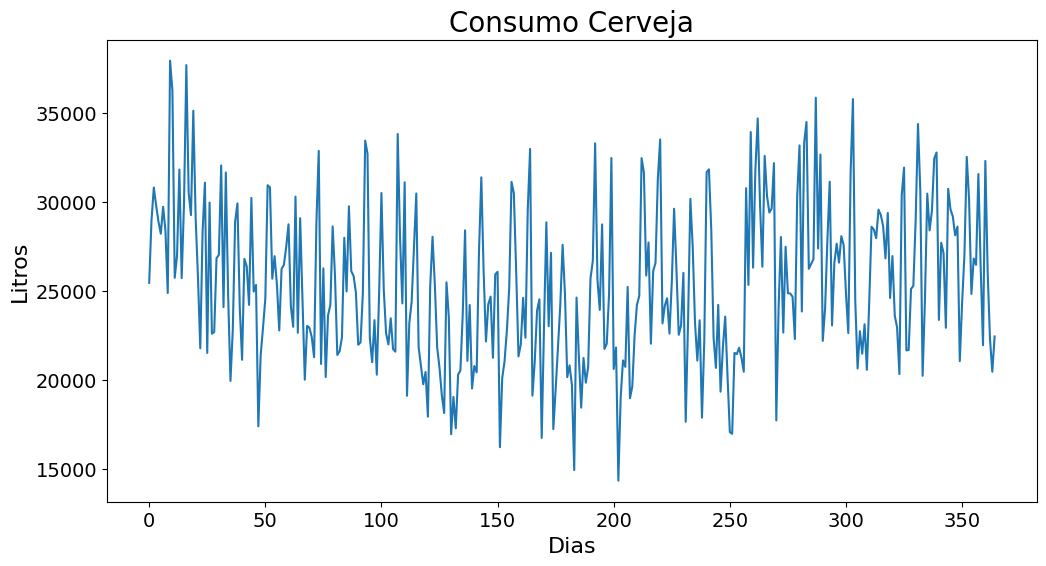

In [11]:
# aqui é feito de forma semelhante a de cima, fig e ax formam uma tupla que representam os eixos x e y
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Consumo Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

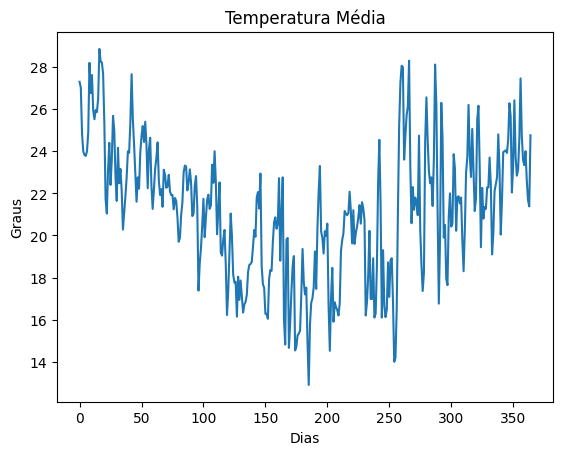

In [12]:

fig, ax = plt.subplots()
ax.set_title('Temperatura Média')
ax.set_ylabel('Graus')
ax.set_xlabel('Dias')
ax = dados['temp_media'].plot()

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [13]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

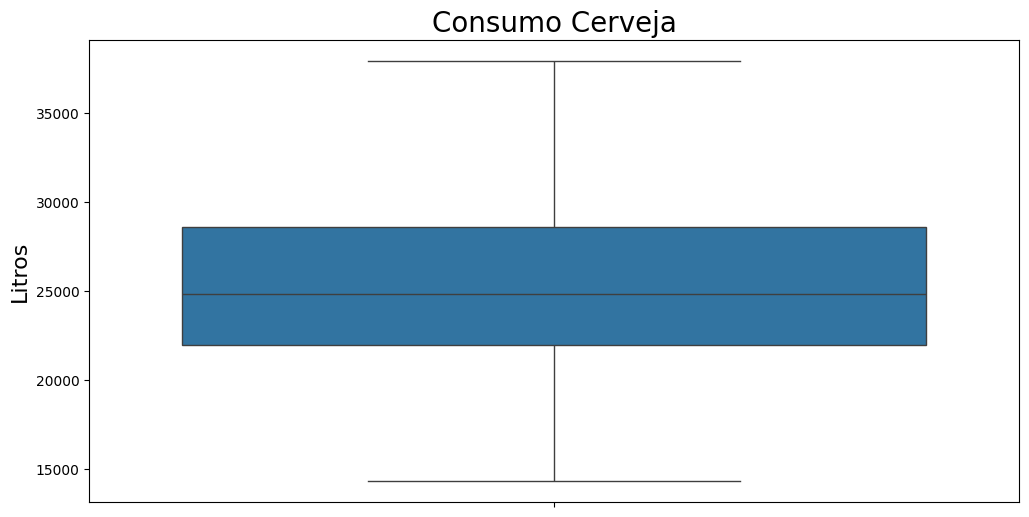

In [14]:
ax = sns.boxplot(data=dados['consumo'], orient='v')

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16);


# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

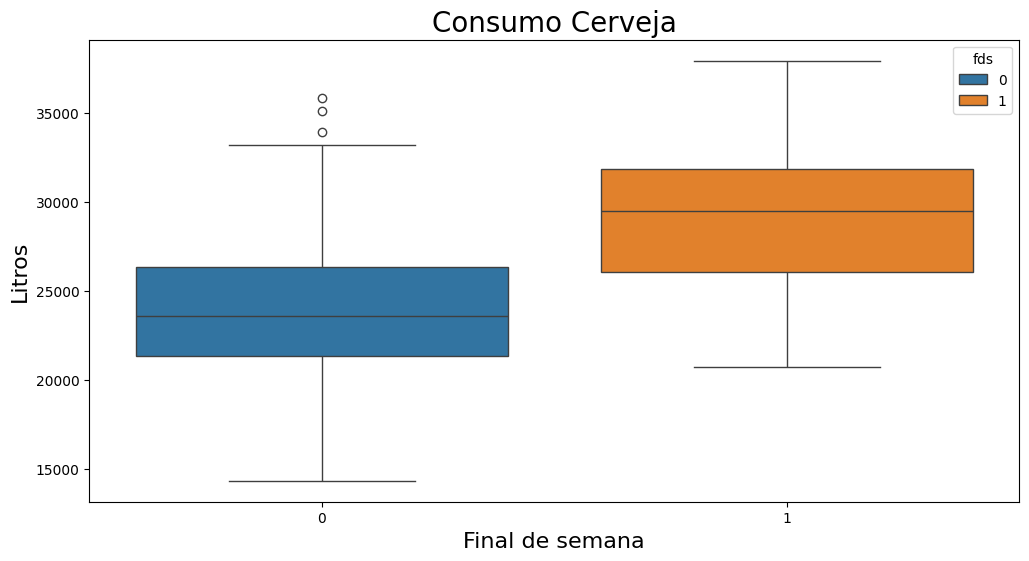

In [15]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', hue='fds')

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de semana', fontsize=16);

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [16]:
sns.set_palette("Accent")

sns.set_style('darkgrid')

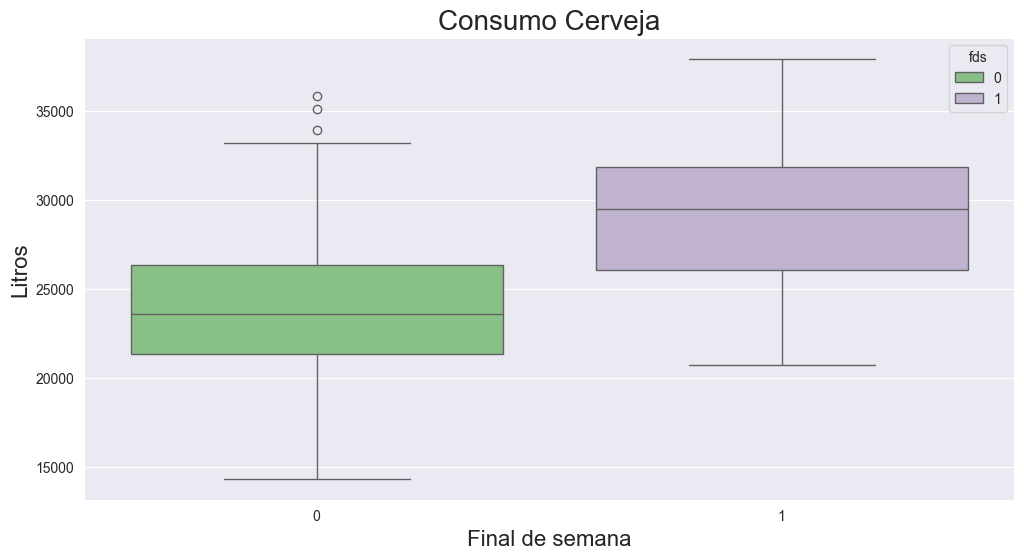

In [17]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', hue='fds')

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de semana', fontsize=16);

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_12572\1072909302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequência - Consumo Cerveja'}, xlabel='consumo', ylabel='Litros'>

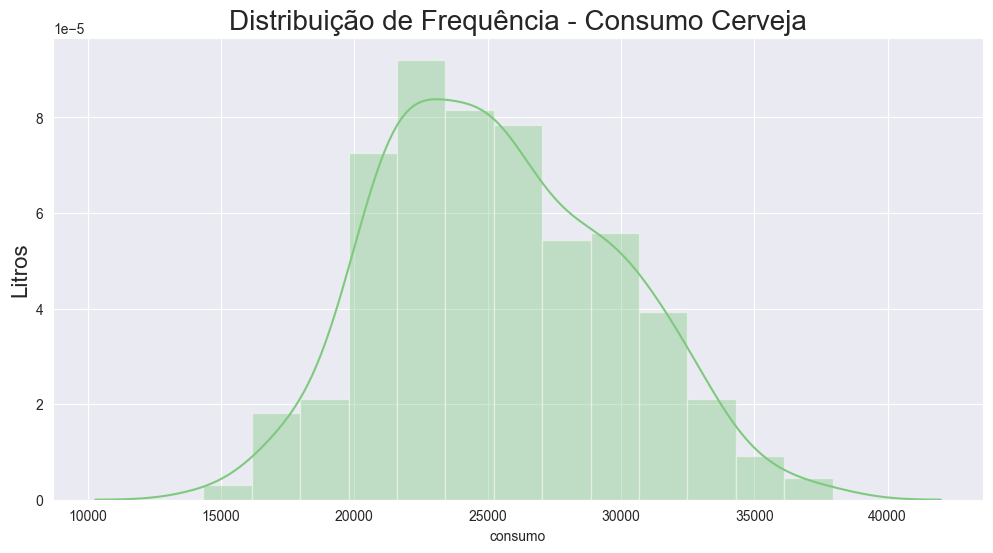

In [18]:
ax = sns.distplot(dados['consumo'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência - Consumo Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

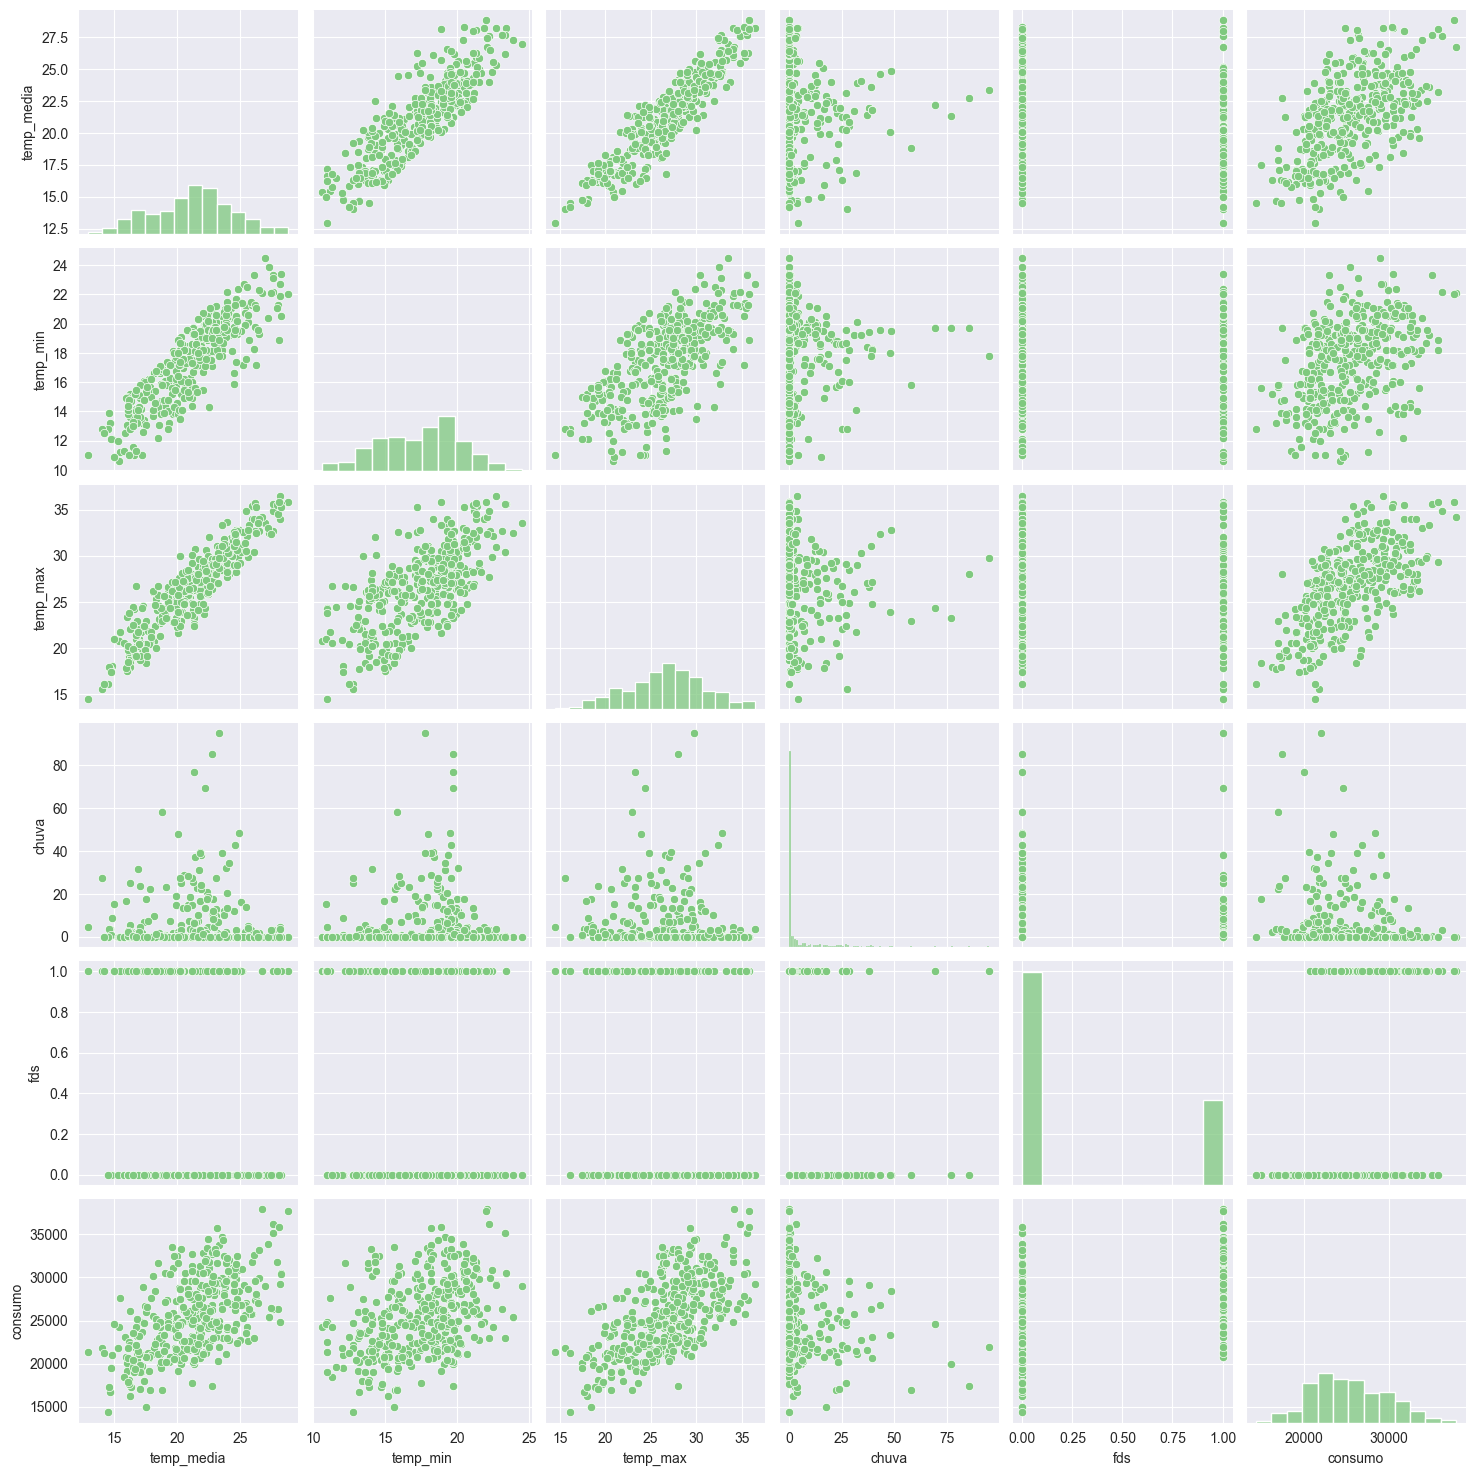

In [19]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

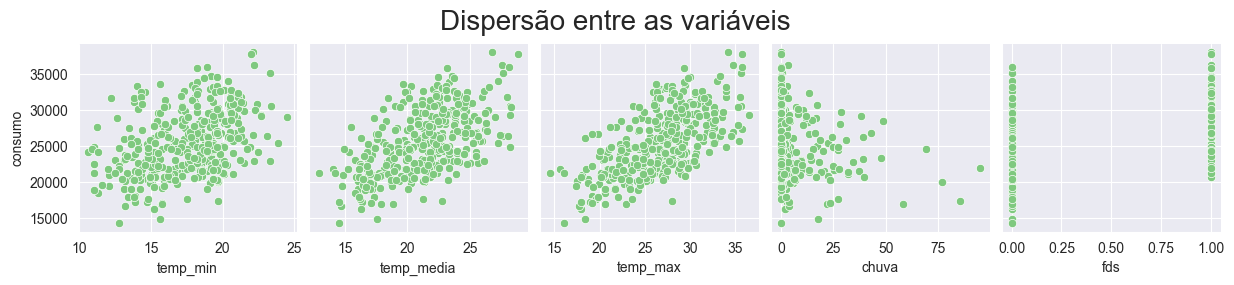

In [20]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.10);

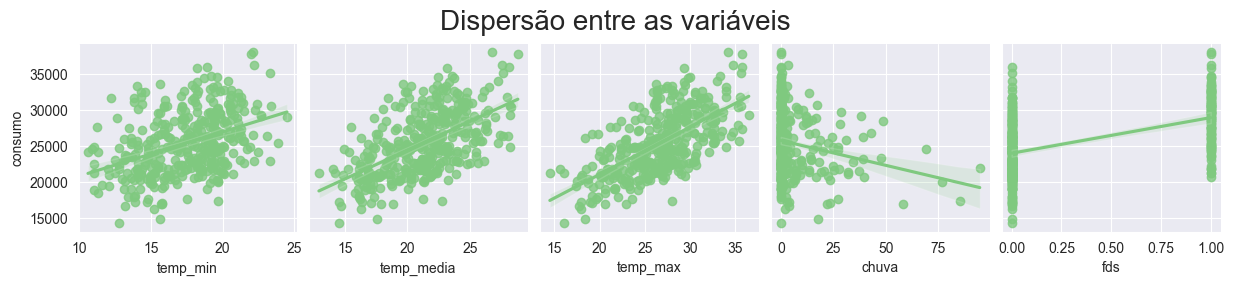

In [21]:
# kind = 'reg' -> traçando a reta, entendendo a linearidade, ou seja, a regressão linear
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.10);

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

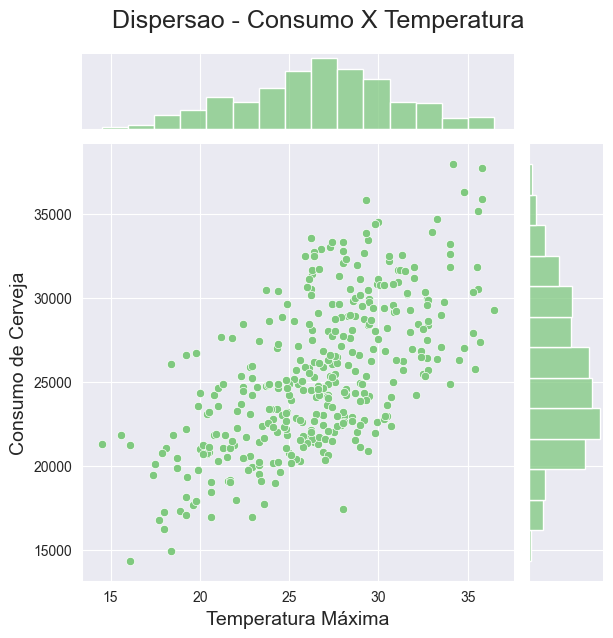

In [22]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax;

## Plotando um jointplot com a reta de regressão estimada

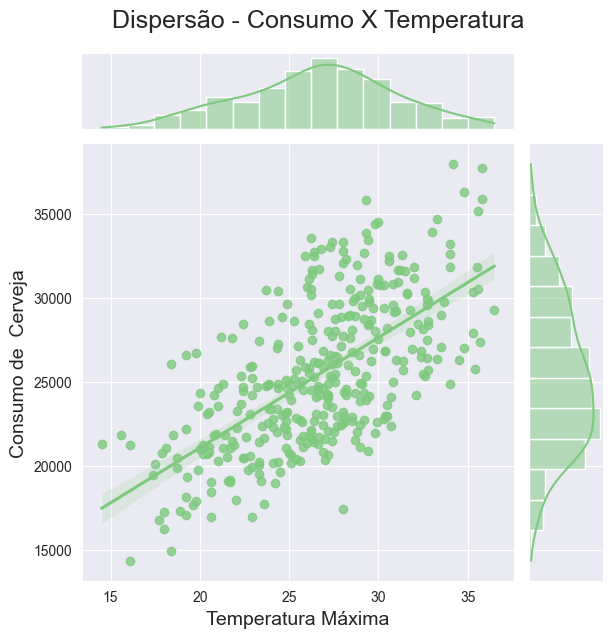

In [23]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

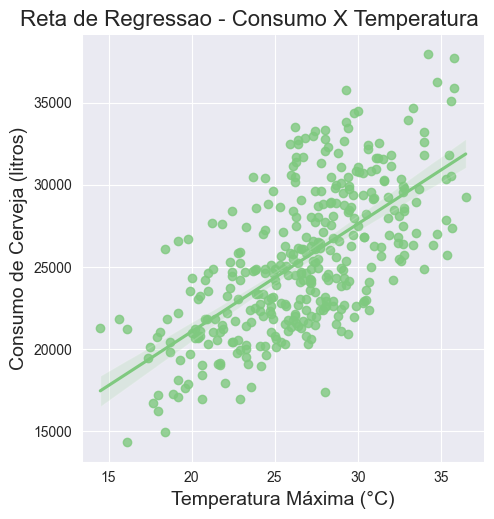

In [24]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax;

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

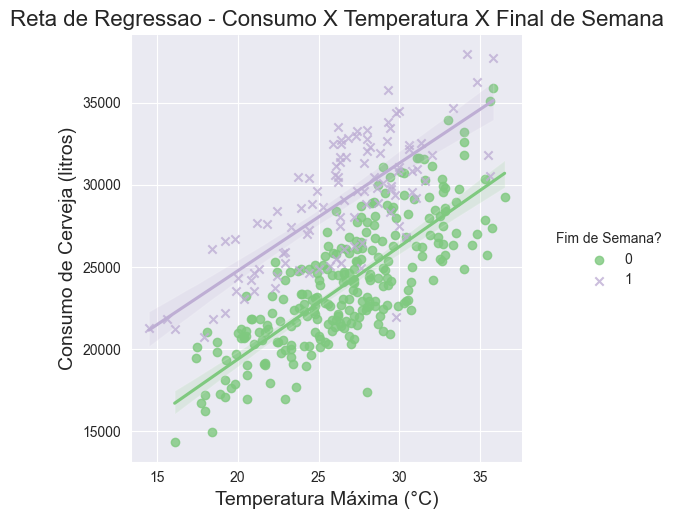

In [25]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue='fds', markers=['o', 'x'], legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

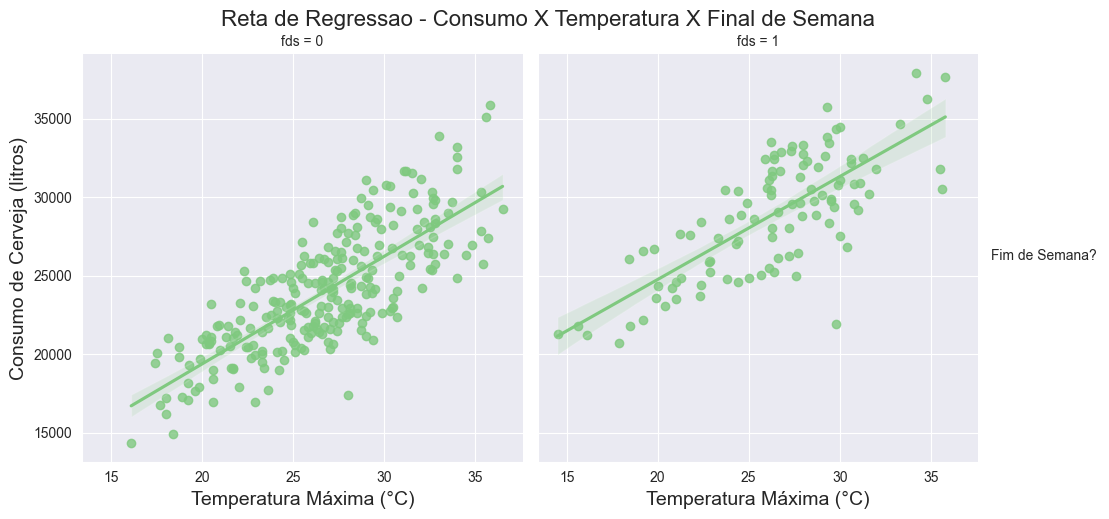

In [26]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, col='fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [28]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [29]:
X = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [31]:
X_train.shape

(255, 3)

In [32]:
X_test.shape

(110, 3)

In [33]:
# retorno de 365, justamente a quantidade de dias que estamos analisando
X_train.shape[0] + X_test.shape[0]

365

In [34]:
# ele fez basicamente isto com a variável que está armazenando os dados
X.shape[0] * 0.3 # 30% para TREINO

109.5

In [35]:
X.shape[0] * 0.7 # 70% para TESTE

255.49999999999997

<img width='600px' src='../Dados/img/reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [37]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [38]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [39]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [40]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [41]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [42]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [43]:
# ou seja, em um dia com uma temperatura max de 30.5 c° com uma quantidade de chuva de 12.2 mm e não é fim de semana
# o consumo em média estimado seria 26.094 litros de cerveja
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [76]:
temp_max = 45
chuva = 0
fds = 1
entrada=[[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0].round(3)} litros')

42166.214 litros


C:\Users\Ronaldo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [45]:
modelo.intercept_

5951.9763393124485

In [46]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [47]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [48]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [49]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [50]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [51]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [52]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

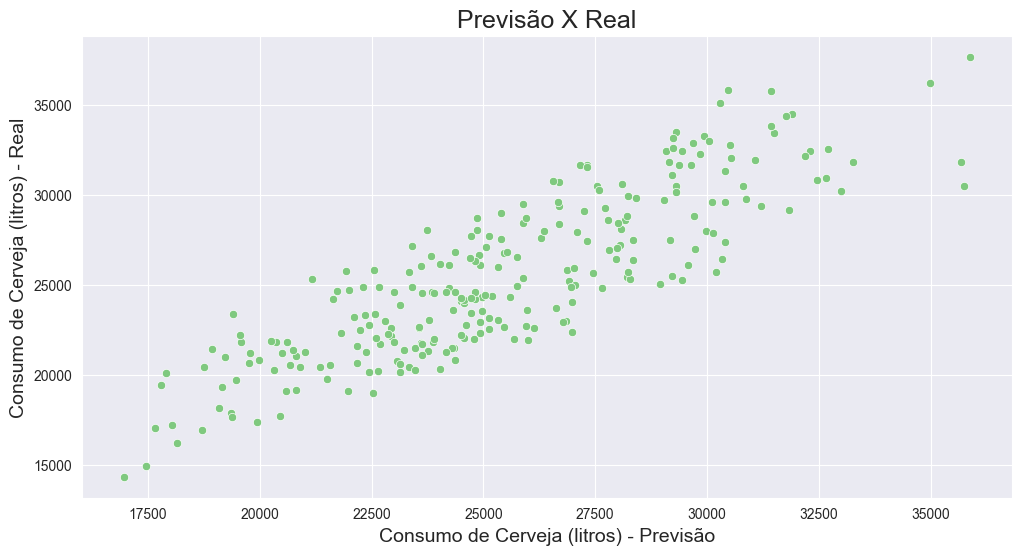

In [53]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

Analisando o gráfico é possível perceber que os dados ficam bem ajustados no início, contudo quando o mesmo vai avançando as previsões começam a ficar mais dispersas ou menos precisas. Isto é um problema, pois mostra que no fim há sim uma imprecisão na estimação dos dados.

## Obtendo os resíduos

In [54]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

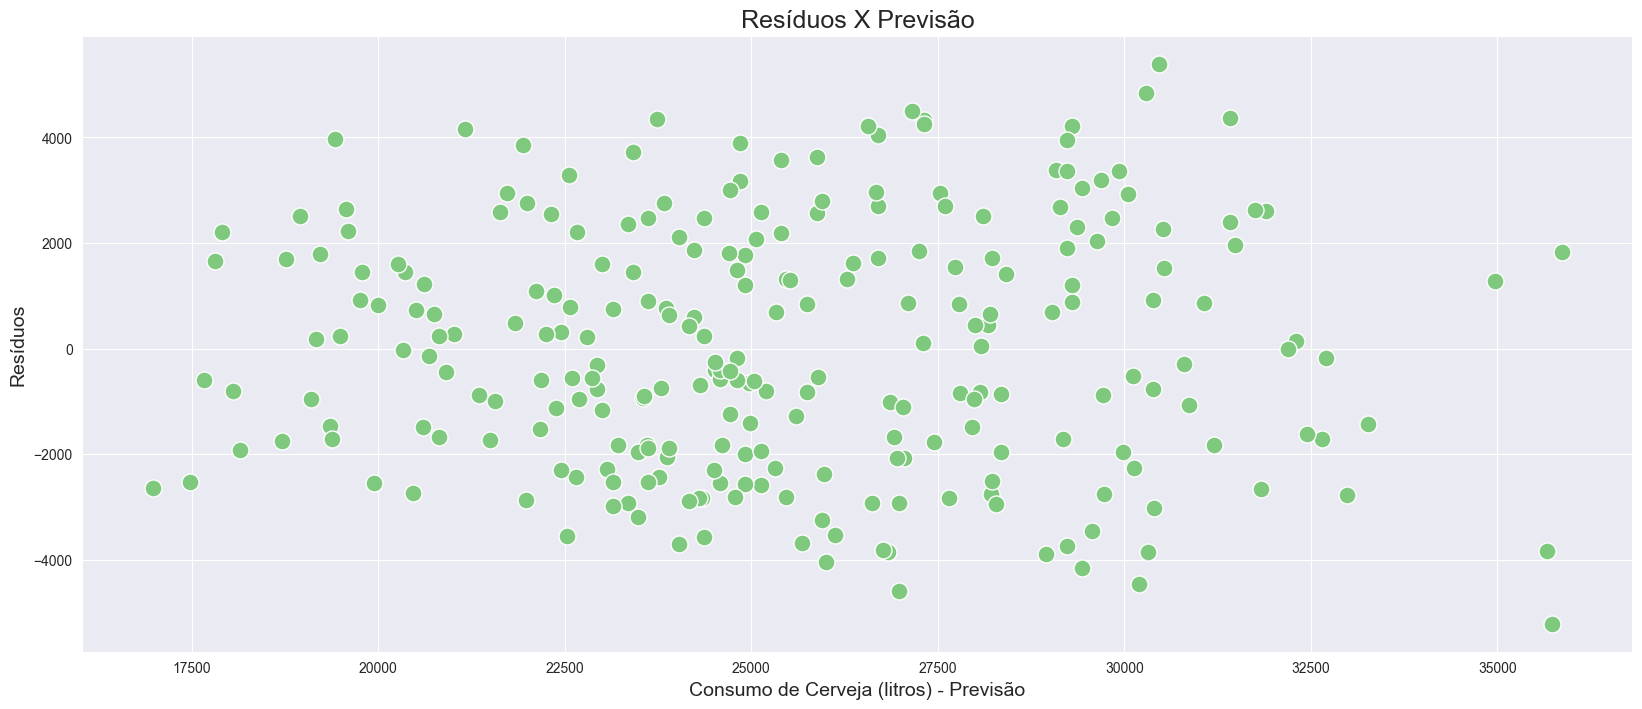

In [55]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150) # s -> aumenta o tamanho da bolinha
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

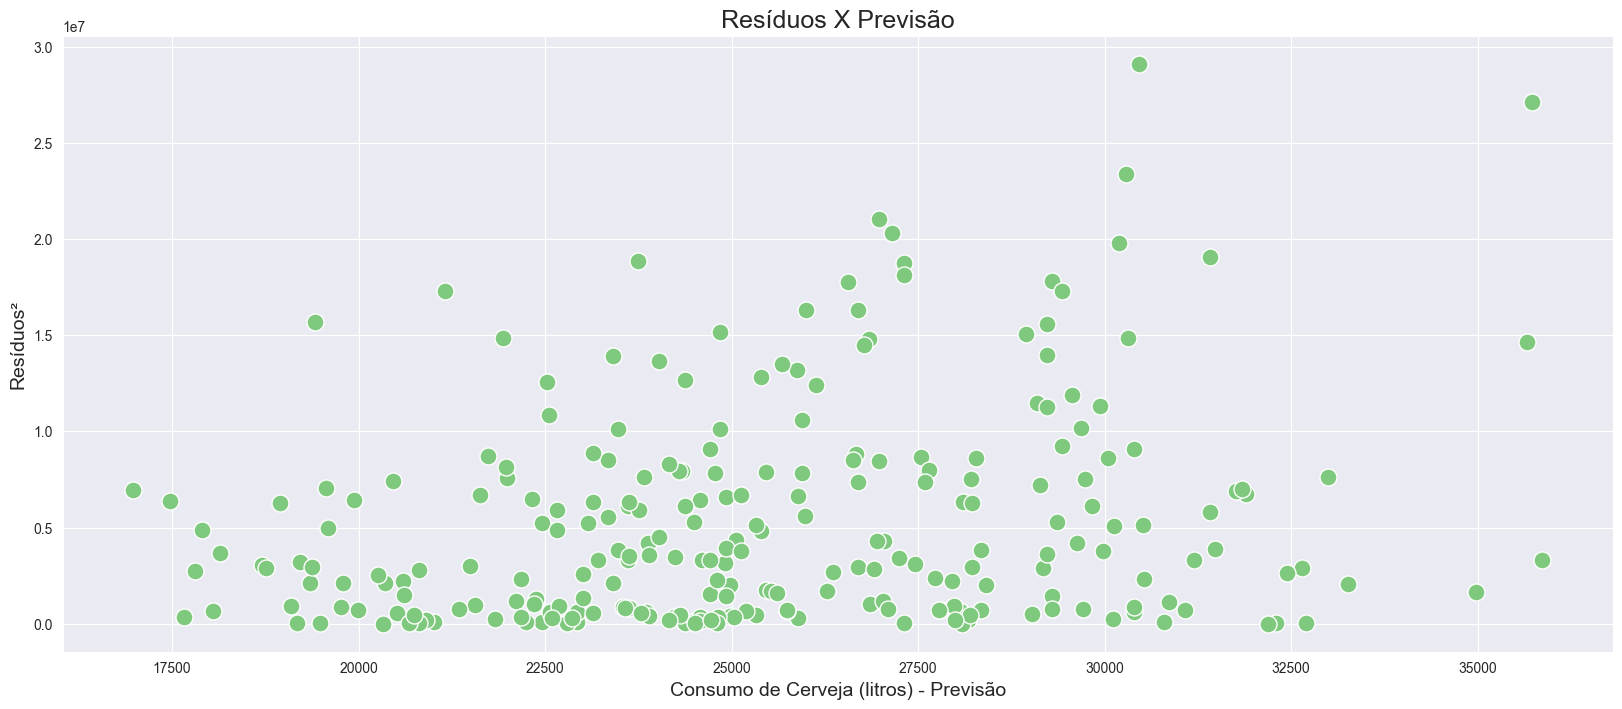

In [56]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

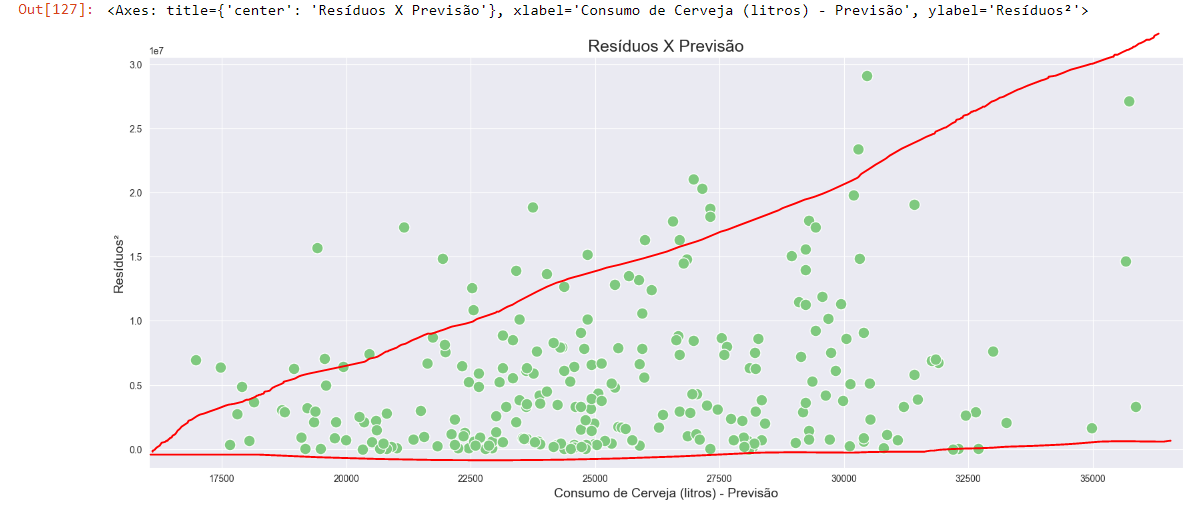

## Plotando a distribuição de frequências dos resíduos

C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_12572\2817200195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

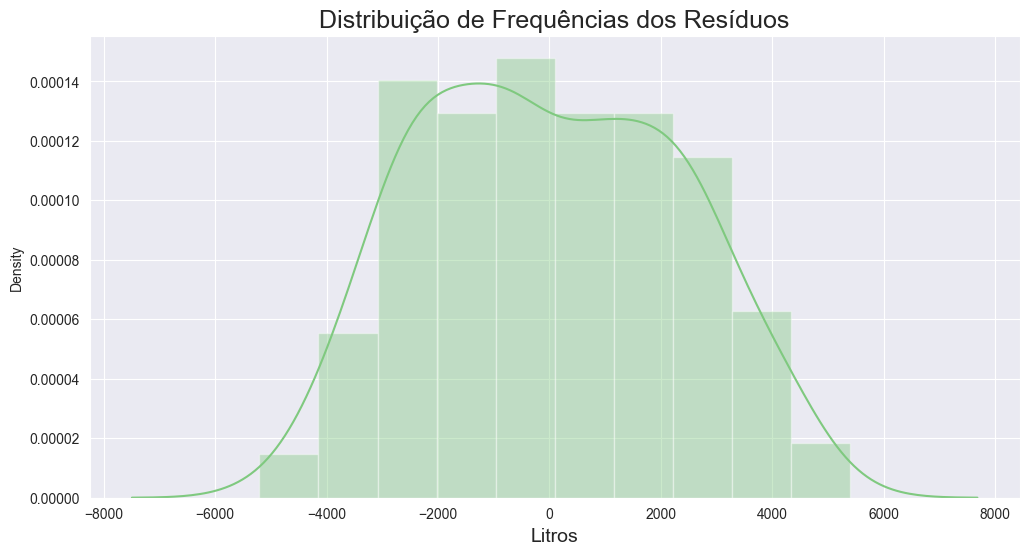

In [57]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

In [58]:
# vemos uma curva normal, o que é realmente ideal para o nosso modelo!

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [59]:
# vamos mudar apenas a variável temp_max para temp_media, assim a variável dependente (consumo) ainda permanece a mesma
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [61]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [62]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [63]:
print('Modelo com Temp. Média')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temp. Média
R² = 0.66


In [64]:
print('Modelo com Temp. Máxima')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [65]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [66]:
print('Modelo com Temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com Temp. Média
R² = 0.66


In [67]:
print('Modelo com Temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temp. Máxima
R² = 0.69


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [68]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['Erro quadrático médio', 'Raiz do erro quadrático médio', 'Coeficiente de determinação'], columns=['Métricas'])

,Métricas
Erro quadrático médio,6060775.46
Raiz do erro quadrático médio,2461.86
Coeficiente de determinação,0.66


### Quanto menor o EQM e REQM melhor
### Quanto maior o R2 melhor

## Obtendo métricas para o modelo com Temperatura Máxima

In [69]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [70]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [71]:
entrada = X_test[0:1]

## Gerando previsão pontual

## Criando um simulador simples

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [72]:
import pickle

In [73]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```